In [1]:

#A*
class Graph:
    def __init__(self,adjac_lis):
        self.adjac_lis = adjac_lis
    def get_neighbours(self,v):
        return self.adjac_lis[v]
    def h(self,n):
        H={'A':1,'B':1, 'C':1,'D':1}
        return H[n]
    def a_star_algorithm(self,start,stop):
        open_lst = set([start])
        closed_lst = set([])
        dist ={}
        dist[start] = 0
        prenode ={}
        prenode[start] =start
        while len(open_lst)>0:
            n = None
            for v in open_lst:
                if n==None or dist[v]+self.h(v)<dist[n]+self.h(n):
                    n=v;
            if n==None:
                print("path doesnot exist")
                return None
            if n==stop:
                 reconst_path=[]
                 while prenode[n]!=n:
                     reconst_path.append(n)
                     n = prenode[n]
                 reconst_path.append(start)
                 reconst_path.reverse()
                 print("path found:{}".format(reconst_path))
                 return reconst_path
            for (m,weight) in self.get_neighbours(n):
                if m not in open_lst and m not in closed_lst:
                    open_lst.add(m)
                    prenode[m] = n
                    dist[m] = dist[n]+weight
                else:
                    if dist[m]>dist[n]+weight:
                        dist[m] = dist[n]+weight
                        prenode[m]=n
                        if m in closed_lst:
                            closed_lst.remove(m)
                            open_lst.add(m)
            open_lst.remove(n)
            closed_lst.add(n)
        print("Path doesnot exist")
        return None
adjac_lis ={'A':[('B',1),('C',3),('D',7)],'B':[('D',5)],'C':[('D',12)]}
graph1=Graph(adjac_lis)
graph1.a_star_algorithm('A', 'D')

path found:['A', 'B', 'D']


['A', 'B', 'D']

In [2]:
#AO*
def recAOStar(n):
    global finalPath
    print("Expanding Node:",n)
    and_nodes = []
    or_nodes =[]
    if(n in allNodes):
        if 'AND' in allNodes[n]:
            and_nodes = allNodes[n]['AND']
        if 'OR' in allNodes[n]:
            or_nodes = allNodes[n]['OR']
    if len(and_nodes)==0 and len(or_nodes)==0:
        return
    
    solvable = False
    marked ={}
    
    while not solvable:
        if len(marked)==len(and_nodes)+len(or_nodes):
            min_cost_least,min_cost_group_least = least_cost_group(and_nodes,or_nodes,{})
            solvable = True
            change_heuristic(n,min_cost_least)
            optimal_child_group[n] = min_cost_group_least
            continue
        min_cost,min_cost_group = least_cost_group(and_nodes,or_nodes,marked)
        is_expanded = False
        if len(min_cost_group)>1:
            if(min_cost_group[0] in allNodes):
                is_expanded = True
                recAOStar(min_cost_group[0])
            if(min_cost_group[1] in allNodes):
                is_expanded = True
                recAOStar(min_cost_group[1])
        else:
            if(min_cost_group in allNodes):
                is_expanded = True
                recAOStar(min_cost_group)
        if is_expanded:
            min_cost_verify, min_cost_group_verify = least_cost_group(and_nodes, or_nodes, {})
            if min_cost_group == min_cost_group_verify:
                solvable = True
                change_heuristic(n, min_cost_verify)
                optimal_child_group[n] = min_cost_group
        else:
            solvable = True
            change_heuristic(n, min_cost)
            optimal_child_group[n] = min_cost_group
        marked[min_cost_group]=1
    return heuristic(n)

def least_cost_group(and_nodes, or_nodes, marked):
    node_wise_cost = {}
    for node_pair in and_nodes:
        if not node_pair[0] + node_pair[1] in marked:
            cost = 0
            cost = cost + heuristic(node_pair[0]) + heuristic(node_pair[1]) + 2
            node_wise_cost[node_pair[0] + node_pair[1]] = cost
    for node in or_nodes:
        if not node in marked:
            cost = 0
            cost = cost + heuristic(node) + 1
            node_wise_cost[node] = cost
    min_cost = 999999
    min_cost_group = None
    for costKey in node_wise_cost:
        if node_wise_cost[costKey] < min_cost:
            min_cost = node_wise_cost[costKey]
            min_cost_group = costKey
    return [min_cost, min_cost_group]

def heuristic(n):
    return H_dist[n]

def change_heuristic(n, cost):
    H_dist[n] = cost
    return

def print_path(node):
    print(optimal_child_group[node], end="")
    node = optimal_child_group[node]
    if len(node) > 1:
        if node[0] in optimal_child_group:
            print("->", end="")
            print_path(node[0])
        if node[1] in optimal_child_group:
            print("->", end="")
            print_path(node[1])
    else:
        if node in optimal_child_group:
            print("->", end="")
            print_path(node)
H_dist = {
 'A': -1,
 'B': 4,
 'C': 2,
 'D': 3,
 'E': 6,
 'F': 8,
 'G': 2,
 'H': 0,
 'I': 0,
 'J': 0
}
allNodes = {
 'A': {'AND': [('C', 'D')], 'OR': ['B']},
 'B': {'OR': ['E', 'F']},
 'C': {'OR': ['G'], 'AND': [('H', 'I')]},
 'D': {'OR': ['J']}
}
optimal_child_group = {}
optimal_cost = recAOStar('A')
print('Nodes which gives optimal cost are')
print_path('A')
print('\nOptimal Cost is :: ', optimal_cost)

Expanding Node: A
Expanding Node: B
Expanding Node: C
Expanding Node: D
Nodes which gives optimal cost are
CD->HI->J
Optimal Cost is ::  5


In [3]:
#candidate elimibnation
import numpy as np
import pandas as pd
# Loading Data from a CSV File
data = pd.DataFrame(data=pd.read_csv('trainingdata.csv'))
print(data)
# Separating concept features from Target
concepts = np.array(data.iloc[:,0:-1])
print(concepts)
# Isolating target into a separate DataFrame
# copying last column to target array
target = np.array(data.iloc[:,-1])
print(target)
def learn(concepts, target):
    
    '''
    learn() function implements the learning method of the Candidate elimination algorithm.
    Arguments:
        concepts - a data frame with all the features
        target - a data frame with corresponding output values
    '''

    # Initialise S0 with the first instance from concepts
    # .copy() makes sure a new list is created instead of just pointing to the same memory location
    specific_h = concepts[0].copy()
    print("\nInitialization of specific_h and general_h")
    print(specific_h)
    #h=["#" for i in range(0,5)]
    #print(h)

    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
    print(general_h)
    # The learning iterations
    for i, h in enumerate(concepts):

        # Checking if the hypothesis has a positive target
        if target[i] == "Yes":
            for x in range(len(specific_h)):

                # Change values in S & G only if values change
                if h[x] != specific_h[x]:
                    specific_h[x] = '?'
                    general_h[x][x] = '?'

        # Checking if the hypothesis has a positive target
        if target[i] == "No":
            for x in range(len(specific_h)):
                # For negative hyposthesis change values only  in G
                if h[x] != specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'

        print("\nSteps of Candidate Elimination Algorithm",i+1)
        print(specific_h)
        print(general_h)
    
    # find indices where we have empty rows, meaning those that are unchanged
    indices = [i for i, val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]
    for i in indices:
        # remove those rows from general_h
        general_h.remove(['?', '?', '?', '?', '?', '?'])
    # Return final values
    return specific_h, general_h
s_final, g_final = learn(concepts, target)
print("\nFinal Specific_h:", s_final, sep="\n")
print("\nFinal General_h:", g_final, sep="\n")

     sky airTemp humidity    wind water forecast enjoySport
0  Sunny    Warm   Normal  Strong  Warm     Same        Yes
1  Sunny    Warm     High  Strong  Warm     Same        Yes
2  Rainy    Cold     High  Strong  Warm   Change         No
3  Sunny    Warm     High  Strong  Cool   Change        Yes
[['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
 ['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same']
 ['Rainy' 'Cold' 'High' 'Strong' 'Warm' 'Change']
 ['Sunny' 'Warm' 'High' 'Strong' 'Cool' 'Change']]
['Yes' 'Yes' 'No' 'Yes']

Initialization of specific_h and general_h
['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Steps of Candidate Elimination Algorithm 1
['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], 

In [4]:
#ID3
import numpy as np
import math
import csv
def read_data(filename):
    with open(filename, 'r') as csvfile:
        datareader = csv.reader(csvfile, delimiter=',')
        headers = next(datareader)
        metadata = []
        traindata = []
        for name in headers:
            metadata.append(name)
        for row in datareader:
            traindata.append(row)

    return (metadata, traindata)
class Node:
    def __init__(self, attribute):
        self.attribute = attribute
        self.children = []
        self.answer = ""
        
    def __str__(self):
        return self.attribute
def subtables(data, col, delete):
    dict = {}
    items = np.unique(data[:, col])
    count = np.zeros((items.shape[0], 1), dtype=np.int32)    
    
    for x in range(items.shape[0]):
        for y in range(data.shape[0]):
            if data[y, col] == items[x]:
                count[x] += 1
                
    for x in range(items.shape[0]):
        dict[items[x]] = np.empty((int(count[x]), data.shape[1]), dtype="|S32")
        pos = 0
        for y in range(data.shape[0]):
            if data[y, col] == items[x]:
                dict[items[x]][pos] = data[y]
                pos += 1       
        if delete:
            dict[items[x]] = np.delete(dict[items[x]], col, 1)
        
    return items, dict
def entropy(S):
    items = np.unique(S)

    if items.size == 1:
        return 0
    
    counts = np.zeros((items.shape[0], 1))
    sums = 0
    
    for x in range(items.shape[0]):
        counts[x] = sum(S == items[x]) / (S.size * 1.0)

    for count in counts:
        sums += -1 * count * math.log(count, 2)
    return sums
def gain_ratio(data, col):
    items, dict = subtables(data, col, delete=False) 
                
    total_size = data.shape[0]
    entropies = np.zeros((items.shape[0], 1))
    intrinsic = np.zeros((items.shape[0], 1))
    
    for x in range(items.shape[0]):
        ratio = dict[items[x]].shape[0]/(total_size * 1.0)
        entropies[x] = ratio * entropy(dict[items[x]][:, -1])
        intrinsic[x] = ratio * math.log(ratio, 2)
        
    total_entropy = entropy(data[:, -1])
    iv = -1 * sum(intrinsic)
    
    for x in range(entropies.shape[0]):
        total_entropy -= entropies[x]
        
    return total_entropy / iv
def create_node(data, metadata):
    if (np.unique(data[:, -1])).shape[0] == 1:
        node = Node("")
        node.answer = np.unique(data[:, -1])[0]
        return node
        
    gains = np.zeros((data.shape[1] - 1, 1))
    
    for col in range(data.shape[1] - 1):
        gains[col] = gain_ratio(data, col)
        
    split = np.argmax(gains)
    
    node = Node(metadata[split])    
    metadata = np.delete(metadata, split, 0)    
    
    items, dict = subtables(data, split, delete=True)
    
    for x in range(items.shape[0]):
        child = create_node(dict[items[x]], metadata)
        node.children.append((items[x], child))
    
    return node
def empty(size):
    s = ""
    for x in range(size):
        s += "   "
    return s

def print_tree(node, level):
    if node.answer != "":
        print(empty(level), node.answer)
        return
    print(empty(level), node.attribute)
    for value, n in node.children:
        print(empty(level + 1), value)
        print_tree(n, level + 2)
metadata, traindata = read_data("tennisdata.csv")
data = np.array(traindata)
node = create_node(data, metadata)
print_tree(node, 0)


 Outlook
    Overcast
       b'Yes'
    Rainy
       Windy
          b'False'
             b'Yes'
          b'True'
             b'No'
    Sunny
       Humidity
          b'High'
             b'No'
          b'Normal'
             b'Yes'


In [5]:
#Backpropagation
import numpy as np

X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)     # X = (hours sleeping, hours studying)
y = np.array(([92], [86], [89]), dtype=float)           # y = score on test

# scale units
X = X/np.amax(X, axis=0)        # maximum of X array
y = y/100                       # max test score is 100
class Neural_Network(object):
    def __init__(self):
                            # Parameters
        self.inputSize = 2
        self.outputSize = 1
        self.hiddenSize = 3
                             # Weights
        self.W1 = np.random.randn(self.inputSize, self.hiddenSize)        # (3x2) weight matrix from input to hidden layer
        self.W2 = np.random.randn(self.hiddenSize, self.outputSize)       # (3x1) weight matrix from hidden to output layer

    def forward(self, X):
                             #forward propagation through our network
        self.z = np.dot(X, self.W1)               # dot product of X (input) and first set of 3x2 weights
        self.z2 = self.sigmoid(self.z)            # activation function
        self.z3 = np.dot(self.z2, self.W2)        # dot product of hidden layer (z2) and second set of 3x1 weights
        o = self.sigmoid(self.z3)                 # final activation function
        return o 

    def sigmoid(self, s):
        return 1/(1+np.exp(-s))     # activation function 

    def sigmoidPrime(self, s):
        return s * (1 - s)          # derivative of sigmoid
    
    def backward(self, X, y, o):
                                    # backward propgate through the network
        self.o_error = y - o        # error in output
        self.o_delta = self.o_error*self.sigmoidPrime(o) # applying derivative of sigmoid to 
        self.z2_error = self.o_delta.dot(self.W2.T)    # z2 error: how much our hidden layer weights contributed to output error
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.z2) # applying derivative of sigmoid to z2 error
        self.W1 += X.T.dot(self.z2_delta)       # adjusting first set (input --> hidden) weights
        self.W2 += self.z2.T.dot(self.o_delta)  # adjusting second set (hidden --> output) weights

    def train (self, X, y):
        o = self.forward(X)
        self.backward(X, y, o)
NN = Neural_Network()
for i in range(1000): # trains the NN 1,000 times
    print ("\nInput: \n" + str(X))
    print ("\nActual Output: \n" + str(y)) 
    print ("\nPredicted Output: \n" + str(NN.forward(X)))
    print ("\nLoss: \n" + str(np.mean(np.square(y - NN.forward(X)))))     # mean sum squared loss)
    NN.train(X, y)



Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.50026809]
 [0.49815189]
 [0.49161833]]

Loss: 
0.15527229599033768

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.56477677]
 [0.55934043]
 [0.55918867]]

Loss: 
0.10867195062486512

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.61693698]
 [0.60878476]
 [0.61384425]]

Loss: 
0.07707276198854698

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.65838361]
 [0.64794868]
 [0.65715909]]

Loss: 
0.05587459632538356

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]




Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.89173342]
 [0.8689402 ]
 [0.89497811]]

Loss: 
0.0003012360954738365

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.89192553]
 [0.86912546]
 [0.89516255]]

Loss: 
0.00029936719326472885

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.89210982]
 [0.86930296]
 [0.89533922]]

Loss: 
0.0002976381599264311

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.89228664]
 [0.86947305]
 [0.8955085 ]]

Loss: 
0.00029603752459625123

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]


 [0.89926158]]

Loss: 
0.00027155707136594296

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.89648221]
 [0.87324084]
 [0.89927145]]

Loss: 
0.00027145534583754256

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.89649745]
 [0.87324985]
 [0.89928087]]

Loss: 
0.00027135425245364

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.89651227]
 [0.87325843]
 [0.89928987]]

Loss: 
0.00027125374999014356

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.89652666]
 [0.87326659]
 [0.89929846]]

Loss: 
0.0002711538002436279

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.


Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.89703124]
 [0.87334655]
 [0.89941311]]

Loss: 
0.00026476695998804

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.8970355 ]
 [0.87334476]
 [0.89941184]]

Loss: 
0.0002646778096183179

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.89703973]
 [0.87334294]
 [0.89941054]]

Loss: 
0.0002645887261556687

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.89704394]
 [0.8733411 ]
 [0.89940922]]

Loss: 
0.00026449970937078343

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0


Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.89729796]
 [0.87318632]
 [0.89928829]]

Loss: 
0.0002585112993817666

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.89730138]
 [0.87318394]
 [0.89928637]]

Loss: 
0.00025842666842224444

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.8973048 ]
 [0.87318156]
 [0.89928445]]

Loss: 
0.0002583420974694395

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.89730822]
 [0.87317918]
 [0.89928253]]

Loss: 
0.0002582575864598448

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 


Predicted Output: 
[[0.89755103]
 [0.87300775]
 [0.89914223]]

Loss: 
0.0002522460247309473

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.89755429]
 [0.87300545]
 [0.89914032]]

Loss: 
0.0002521657798371228

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.89755754]
 [0.87300316]
 [0.89913842]]

Loss: 
0.0002520855903770353

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.89756079]
 [0.87300086]
 [0.89913651]]

Loss: 
0.00025200545629348517

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.89756404]
 [0.87299856]
 [0.89913461]]

Loss: 
0.000251925377529346

Input: 
[[0.66666667 1.   

 [0.89907032]]

Loss: 
0.00024923521150175735

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.89767673]
 [0.87291922]
 [0.89906844]]

Loss: 
0.0002491570334882507

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.89767993]
 [0.87291698]
 [0.89906656]]

Loss: 
0.0002490789087854081

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.89768312]
 [0.87291475]
 [0.89906468]]

Loss: 
0.00024900083733873647

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.8976863 ]
 [0.87291251]
 [0.89906281]]

Loss: 
0.0002489228190938122

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0


Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.89808217]
 [0.8726387 ]
 [0.89882854]]

Loss: 
0.0002393570252211402

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.89808517]
 [0.87263665]
 [0.89882676]]

Loss: 
0.00023928543776763597

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.89808817]
 [0.87263461]
 [0.89882497]]

Loss: 
0.00023921389699292997

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.89809117]
 [0.87263257]
 [0.89882319]]

Loss: 
0.00023914240285081938

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.89809417]
 [0.87263052]
 [0.89882141]]

Loss: 
0.00

 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.89859556]
 [0.87229524]
 [0.89852085]]

Loss: 
0.0002273092932659099

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.89859833]
 [0.87229342]
 [0.89851917]]

Loss: 
0.00022724533647693794

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.8986011]
 [0.8722916]
 [0.8985175]]

Loss: 
0.0002271814189708498

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.89860387]
 [0.87228979]
 [0.89851583]]

Loss: 
0.00022711754071041266

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.89860664]
 [0.87228797]
 [0.8


Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.89901916]
 [0.87202192]
 [0.89826336]]

Loss: 
0.00021766838559850665

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.89902176]
 [0.87202027]
 [0.89826177]]

Loss: 
0.00021761020061200877

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.89902435]
 [0.87201863]
 [0.89826019]]

Loss: 
0.00021755204953427618

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.89902694]
 [0.87201699]
 [0.8982586 ]]

Loss: 
0.0002174939323343381

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]

Actual Output: 
[[0.92]
 [0.86]
 [0.89]]

Predicted Output: 
[[0.89902953]
 [0.87201535]
 [0.89825702]]

Loss: 
0.00

In [6]:
#naive bayes
# import necessary libarities
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

# load data from CSV
data = pd.read_csv('tennisdata.csv')
print("THe first 5 values of data is :\n",data.head())
# obtain Train data and Train output
X = data.iloc[:,:-1]
print("\nThe First 5 values of train data is\n",X.head())
y = data.iloc[:,-1]
print("\nThe first 5 values of Train output is\n",y.head())
# Convert then in numbers 
le_outlook = LabelEncoder()
X.Outlook = le_outlook.fit_transform(X.Outlook)

le_Temperature = LabelEncoder()
X.Temperature = le_Temperature.fit_transform(X.Temperature)

le_Humidity = LabelEncoder()
X.Humidity = le_Humidity.fit_transform(X.Humidity)

le_Windy = LabelEncoder()
X.Windy = le_Windy.fit_transform(X.Windy)

print("\nNow the Train data is :\n",X.head())
le_PlayTennis = LabelEncoder()
y = le_PlayTennis.fit_transform(y)
print("\nNow the Train output is\n",y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

classifier = GaussianNB()
classifier.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
print("Accuracy is:",accuracy_score(classifier.predict(X_test),y_test))

THe first 5 values of data is :
     Outlook Temperature Humidity  Windy PlayTennis
0     Sunny         Hot     High  False         No
1     Sunny         Hot     High   True         No
2  Overcast         Hot     High  False        Yes
3     Rainy        Mild     High  False        Yes
4     Rainy        Cool   Normal  False        Yes

The First 5 values of train data is
     Outlook Temperature Humidity  Windy
0     Sunny         Hot     High  False
1     Sunny         Hot     High   True
2  Overcast         Hot     High  False
3     Rainy        Mild     High  False
4     Rainy        Cool   Normal  False

The first 5 values of Train output is
 0     No
1     No
2    Yes
3    Yes
4    Yes
Name: PlayTennis, dtype: object

Now the Train data is :
    Outlook  Temperature  Humidity  Windy
0        2            1         0      0
1        2            1         0      1
2        0            1         0      0
3        1            2         0      0
4        1            0         1  

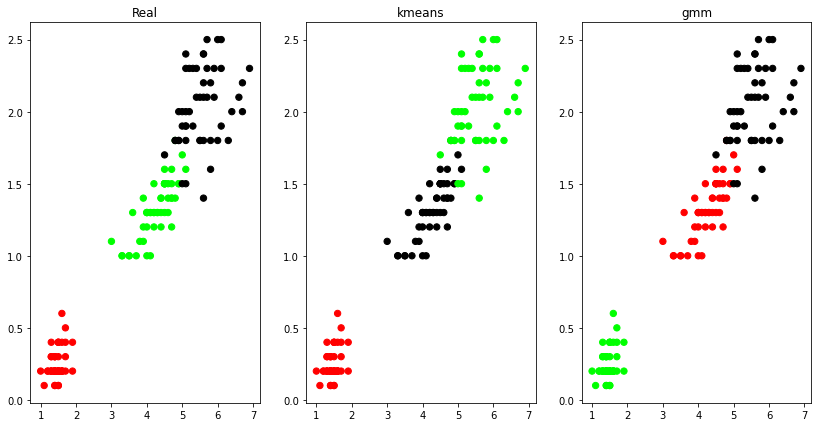

In [16]:
#k-means
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y = pd.Series(data=iris.target, name='Targets')

plt.figure(figsize=(14, 7))
colormap = np.array(['red', 'lime', 'black'])
colormap1 = np.array(['red', 'black', 'lime'])
colormap2 = np.array(['lime', 'red','black'])
# REAL PLOT
plt.subplot(1, 3, 1)
plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=colormap[y], s=40)
plt.title('Real')

plt.subplot(1, 3, 2)
# Assuming you have GMM results stored in a variable called 'gmm_labels'
# Replace 'gmm_labels' with the actual variable containing GMM results
plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=colormap1[y], s=40)
plt.title('kmeans')

plt.subplot(1, 3, 3)
# Replace 'fgfygy_labels' with the actual variable containing results for the third method
plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=colormap2[y], s=40)
plt.title('gmm')

plt.show()


In [17]:
#knn
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np

dataset=load_iris()
#print(dataset)
X_train,X_test,y_train,y_test=train_test_split(dataset["data"],dataset["target"],random_state=0)

kn=KNeighborsClassifier(n_neighbors=1)
kn.fit(X_train,y_train)

for i in range(len(X_test)):
    x=X_test[i]
    x_new=np.array([x])
    prediction=kn.predict(x_new)
    print("TARGET=",y_test[i],dataset["target_names"][y_test[i]],"PREDICTED=",prediction,dataset["target_names"][prediction])
print(kn.score(X_test,y_test))

TARGET= 2 virginica PREDICTED= [2] ['virginica']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 0 setosa PREDICTED= [0] ['setosa']
TARGET= 2 virginica PREDICTED= [2] ['virginica']
TARGET= 0 setosa PREDICTED= [0] ['setosa']
TARGET= 2 virginica PREDICTED= [2] ['virginica']
TARGET= 0 setosa PREDICTED= [0] ['setosa']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 2 virginica PREDICTED= [2] ['virginica']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 0 setosa PREDICTED= [0] ['setosa']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 0 setosa PREDICTED= [0] ['setosa']
TARGET= 0 setosa PREDICTED= [0] ['setosa']
TARGET= 2 virginica PREDICTED= [2] [

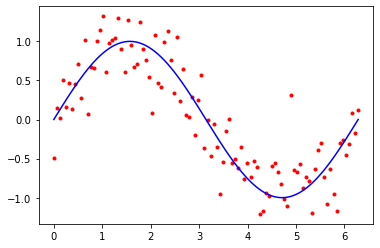

In [18]:
#regression analysis
import matplotlib.pyplot as plt
import numpy as np
import math 
n=100
x = np.linspace(0, 2 * math.pi, n)
y = np.sin(x) + 0.3 * np.random.randn(n)
yest=np.sin(x)
plt.plot(x,y,"r.")
plt.plot(x,yest,"b-")